In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Historical Product Demand.csv")
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [3]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [4]:
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ))

In [5]:
data.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
category=data['Product_Category'].value_counts()
category

Category_019    470266
Category_005    101627
Category_001     97787
Category_007     82402
Category_021     52008
Category_006     35552
Category_028     31012
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14771
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64

In [17]:
len(category)

33

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

plt.style.use('ggplot')
category.plot(kind='bar', figsize=(25,20))

In [9]:
products=data['Product_Code'].value_counts()

In [22]:
len(products)

2160

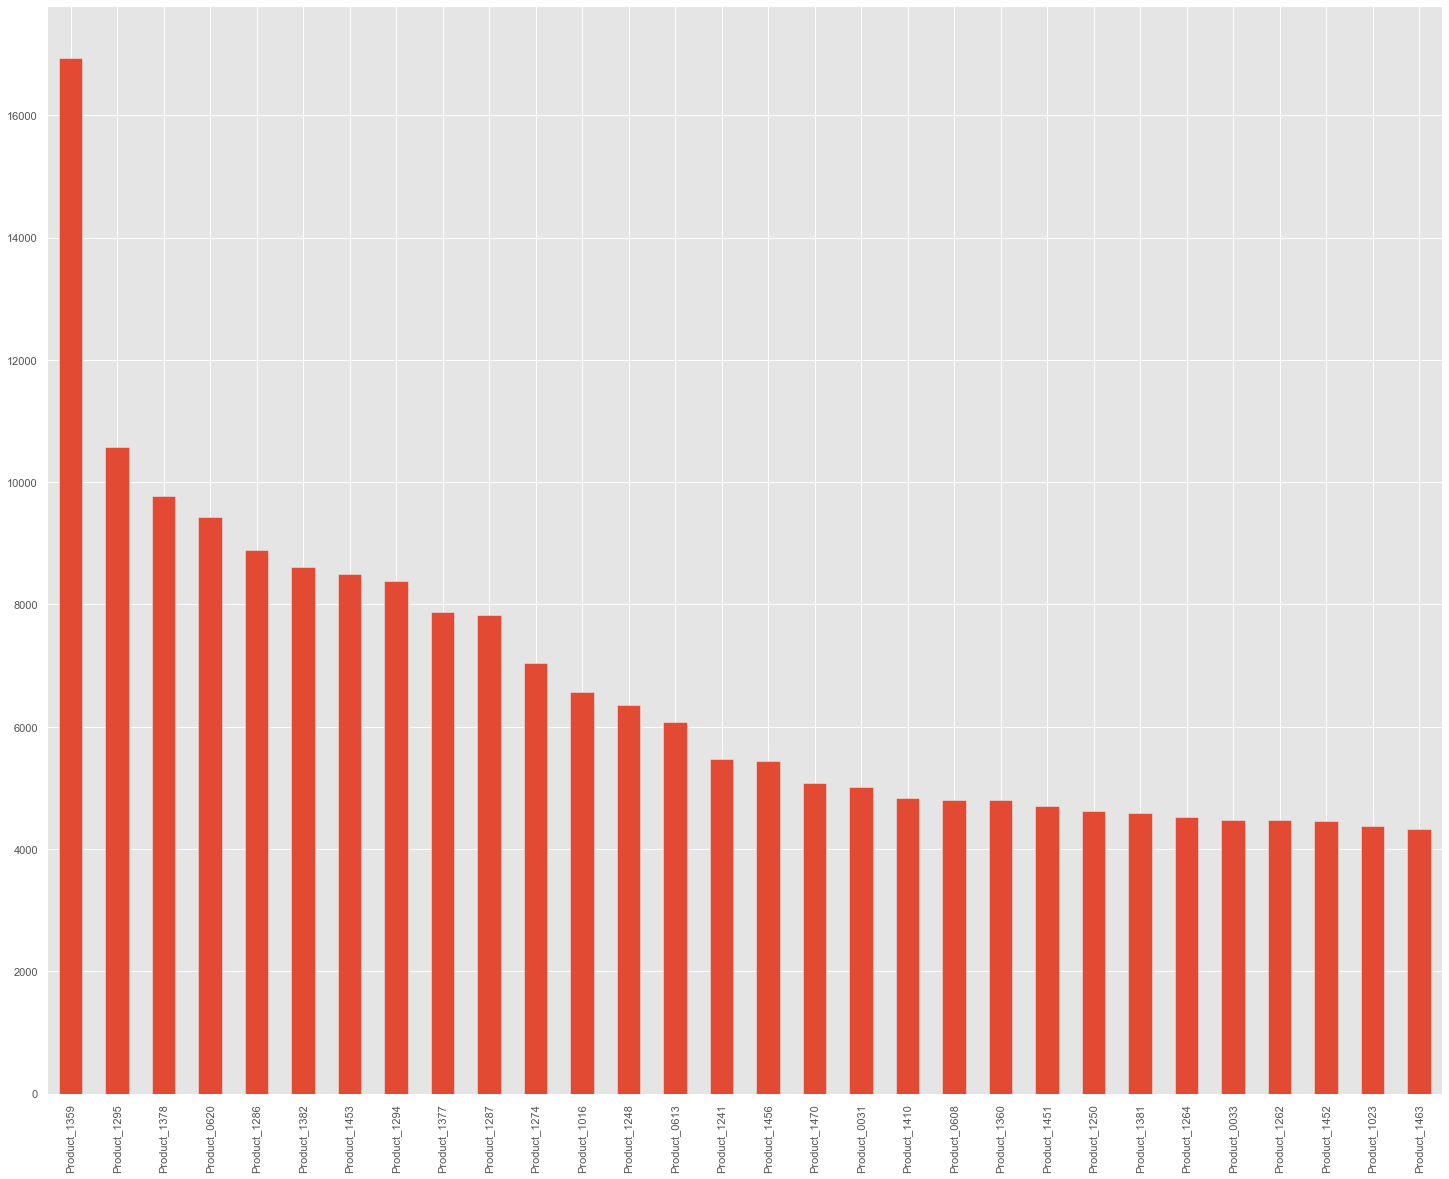

In [7]:
plt.style.use('ggplot')
products[:30].plot(kind='bar',figsize=(25,20))

## Product_1359 Demand Forcasting 

In [10]:
pdemand = data.loc[data['Product_Code'] == 'Product_1359'].sort_values(['Date'],ascending=True)
pdemand.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
19904,Product_1359,Whse_J,Category_019,2012/1/10,50000
11545,Product_1359,Whse_J,Category_019,2012/1/10,25000
2579,Product_1359,Whse_J,Category_019,2012/1/10,1000
180527,Product_1359,Whse_J,Category_019,2012/1/10,2000
49516,Product_1359,Whse_J,Category_019,2012/1/10,1000


In [11]:
dmnd = pdemand.drop(['Product_Code','Warehouse','Product_Category'],axis=1)
dmnd.loc[:,'Date'] = pd.to_datetime(dmnd.loc[:,'Date'], format="%Y/%m/%d")
dmnd.head()

,Date,Order_Demand
19904,2012-01-10,50000
11545,2012-01-10,25000
2579,2012-01-10,1000
180527,2012-01-10,2000
49516,2012-01-10,1000


In [12]:
demandts = dmnd.set_index('Date')
demandts.head()

,Order_Demand
Date,
2012-01-10,50000
2012-01-10,25000
2012-01-10,1000
2012-01-10,2000
2012-01-10,1000


In [21]:
demandts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2012-01-31 to 2017-01-31
Freq: M
Data columns (total 1 columns):
Order_Demand    61 non-null object
dtypes: object(1)
memory usage: 976.0+ bytes


In [13]:
demandts = demandts.resample('M').sum()
demandts.head()

,Order_Demand
Date,
2012-01-31,8911000
2012-02-29,8131000
2012-03-31,7775000
2012-04-30,8960000
2012-05-31,8475000


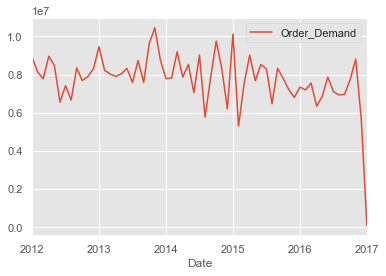

In [14]:
demandts.plot(kind='line')
plt.show()

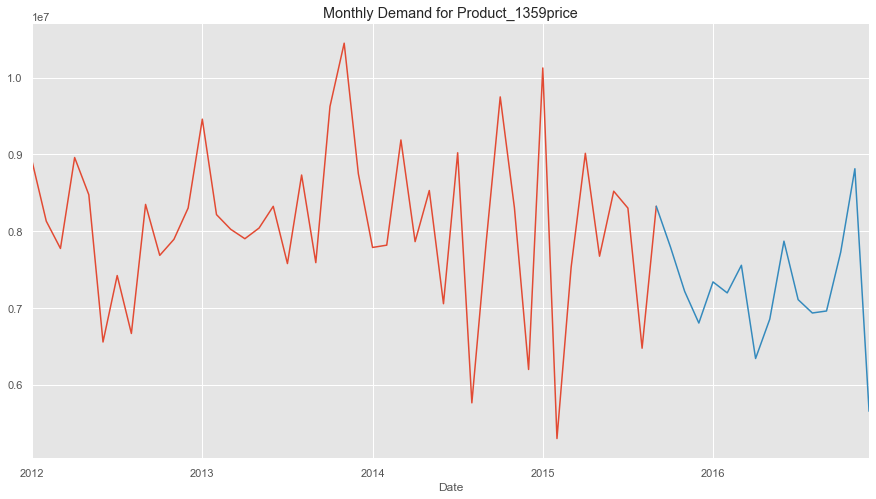

In [49]:
# Creating train and test set

train = demandts[0:45]
test = demandts[44:60]

#Plotting data

train.Order_Demand.plot(figsize=(15,8), title= 'Monthly Demand for Product_1359price')
test.Order_Demand.plot(figsize=(15,8), title= 'Monthly Demand for Product_1359price')
plt.show()

In [18]:
demandts.tail()

,Order_Demand
Date,
2016-09-30,6960000
2016-10-31,7727000
2016-11-30,8814000
2016-12-31,5653000
2017-01-31,100000


## Seasonal ARIMA Model

#### Data stationarity

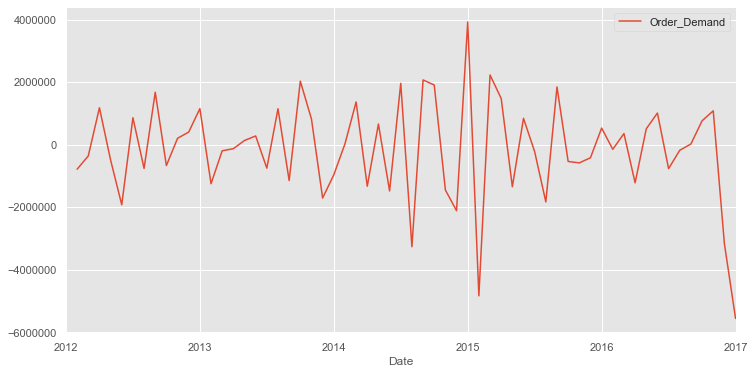

In [50]:
# Detrend data by first differencing data
# Set differencing time as 1

diff1=demandts.diff(1)
diff1.plot(figsize=(12,6))

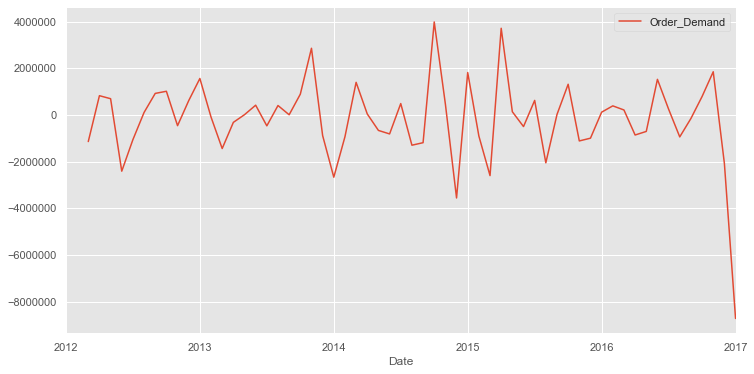

In [51]:
# Set differencing time as 2

diff2=demandts.diff(2)
diff2.plot(figsize=(12,6))

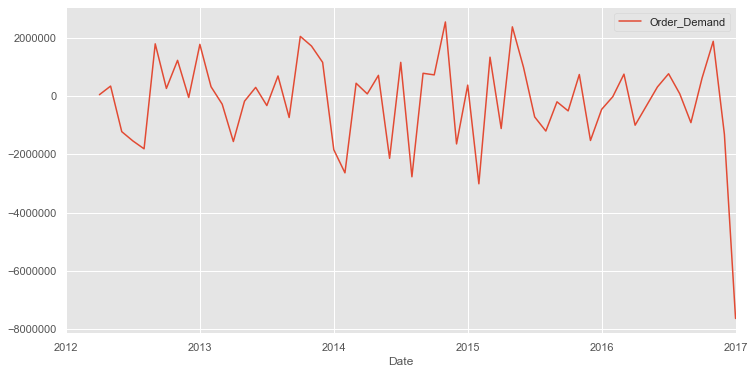

In [25]:
# Set differencing time as 3

diff3=demandts.diff(3)
diff3.plot(figsize=(12,6))

#### ACF and PACF

C:\Users\32985\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


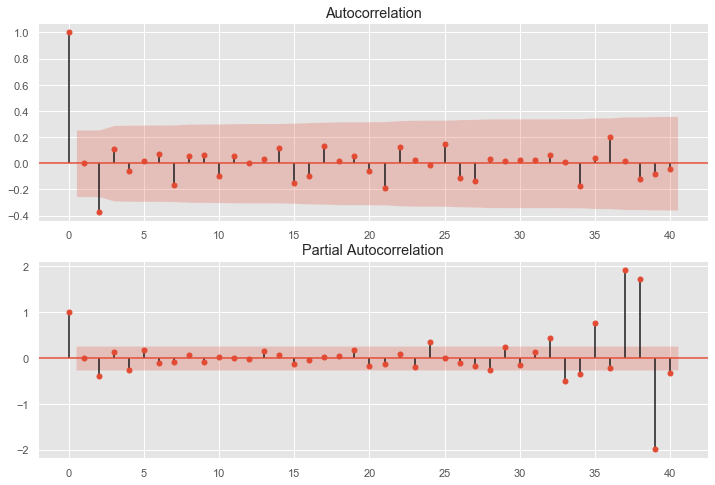

In [26]:

# acf and pacf
import statsmodels.api as sm

diff2.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff2,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff2,lags=40,ax=ax2)

In [ ]:
ACF: 1 order out of boarder, p=1; PACF: q=2

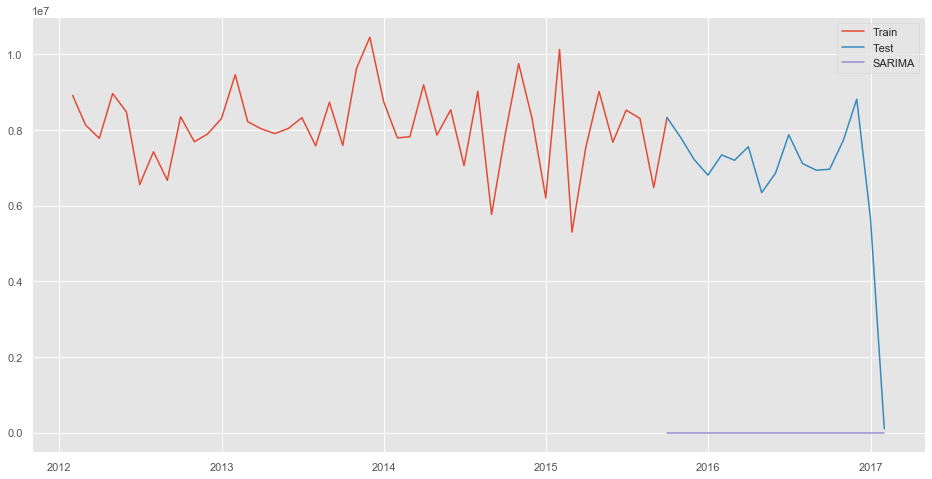

In [47]:
import statsmodels.api as sm
 
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Order_Demand, order=(1, 1, 2), seasonal_order=(0, 1, 1, 4)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2012-01-31", end="2017-01-31", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['Order_Demand'], label='Train')
plt.plot(test['Order_Demand'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

## Prophet Time Series Forecasting

In [55]:
from fbprophet import Prophet

In [56]:
forecast = demandts
forecast = forecast.rename(columns={ 'Order_Demand': "y" })
forecast.reset_index(level=0, inplace=True)
forecast = forecast.rename(columns={ 'Date': "ds" })

In [57]:
from scipy.stats import boxcox
forecast['y'], lam = boxcox(forecast['y'])

model = Prophet()
model.fit(forecast)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = model.make_future_dataframe(periods=12, freq = 'm')
future.tail()

,ds
68,2017-09-30
69,2017-10-31
70,2017-11-30
71,2017-12-31
72,2018-01-31


In [59]:
#predicting the future model
forecast = model.predict(future)
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

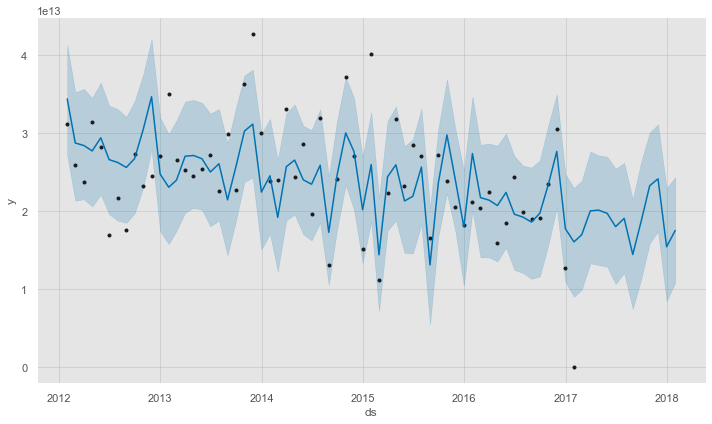

In [60]:
model.plot(forecast_data);